# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]


In [4]:
# 2. Get the total drivers for each city type
sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]


In [5]:
#  3. Get the total amount of fares for each city type
sum_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]


In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_type = sum_fare_by_type / sum_rides_by_type

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = sum_fare_by_type / sum_drivers_by_type


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    'Total Rides': sum_rides_by_type,
    'Total Drivers': sum_drivers_by_type,
    'Total Fares': sum_fare_by_type,
    'Average Fare Per Ride': average_fare_per_type ,
    'Average Fare per Driver': average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns
pyber_summary_df["Total Fares"]= pyber_summary_df ['Total Fares'].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"]= pyber_summary_df ['Average Fare Per Ride'].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]= pyber_summary_df ['Average Fare per Driver'].map("${:,.2f}".format)
pyber_summary_df





,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_date_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
pyber_date_df

type   date         
Rural  1/1/19 9:45      43.69
       1/11/19 4:39     16.42
       1/14/19 15:58    54.10
       1/14/19 7:09     18.05
       1/15/19 21:44    30.26
                        ...  
Urban  5/8/19 1:54      32.69
       5/8/19 2:31      41.33
       5/8/19 4:20      21.99
       5/8/19 4:39      18.45
       5/8/19 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_date_df = pyber_date_df.reset_index()
pyber_date_df


,type,date,fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26
...,...,...,...
2359,Urban,5/8/19 1:54,32.69
2360,Urban,5/8/19 2:31,41.33
2361,Urban,5/8/19 4:20,21.99
2362,Urban,5/8/19 4:39,18.45


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_date_df = pyber_date_df.pivot(index='date',columns='type',values='fare')

pyber_date_df

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
5/8/19 1:54,NaN,NaN,32.69
5/8/19 2:31,NaN,NaN,41.33
5/8/19 4:20,NaN,NaN,21.99


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_specific_dates_df = pyber_date_df.loc[(pyber_date_df.index >="1-1-2019") &
(pyber_date_df.index <= "4-28-2019")]

pyber_specific_dates_df

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
3/9/19 3:25,NaN,NaN,39.32
3/9/19 3:50,NaN,NaN,40.86
3/9/19 4:39,NaN,NaN,14.41


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_specific_dates_df.index = pd.to_datetime(pyber_specific_dates_df.index)

In [21]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_specific_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1646 entries, 2019-01-01 00:08:00 to 2019-03-09 09:54:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     79 non-null     float64
 1   Suburban  431 non-null    float64
 2   Urban     1138 non-null   float64
dtypes: float64(3)
memory usage: 51.4 KB


In [23]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_fare_per_week = pyber_specific_dates_df.resample('W').sum()
pyber_fare_per_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<function matplotlib.pyplot.show(close=None, block=None)>

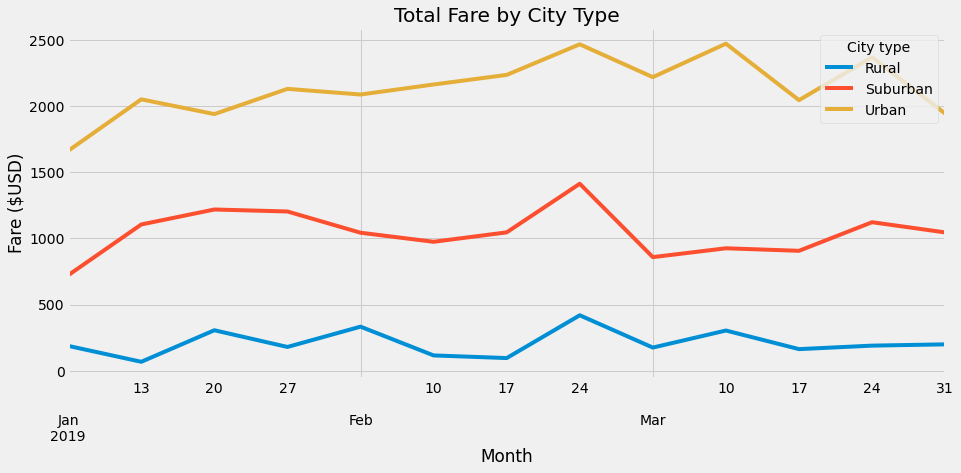

In [24]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
pyber_fare_per_week.plot(figsize =(14,6))

plt.title("Total Fare by City Type")
plt.xlabel("Month")
plt.ylabel("Fare ($USD)")
lgnd = plt.legend(title = "City type")

plt.savefig("analysis/Pyber_fare_summary.png")

plt.show



